# CO2 Emission Time Series Forecasting using Deep Learning

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(style="whitegrid")
import warnings
warnings.filterwarnings("ignore")

# EDA

In [2]:
data = pd.read_csv('MER_T12_06.csv')
data.head()

,MSN,YYYYMM,Value,Column_Order,Description,Unit
0,CLEIEUS,197301,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1,CLEIEUS,197302,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
2,CLEIEUS,197303,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
3,CLEIEUS,197304,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
4,CLEIEUS,197305,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


In [3]:
print('\nData Information:')
print(data.info())


Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5094 entries, 0 to 5093
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MSN           5094 non-null   object
 1   YYYYMM        5094 non-null   int64 
 2   Value         5094 non-null   object
 3   Column_Order  5094 non-null   int64 
 4   Description   5094 non-null   object
 5   Unit          5094 non-null   object
dtypes: int64(2), object(4)
memory usage: 238.9+ KB
None


Dataset mempunyai 6 kolom dimana 2 diantaranya adalah data bertipe integer dan 4 object dengan 5096 observasi. Kemudian kolom YYYYMM yang merupakan datetime, masih harus kita ubah menjadi tipe data datetime.

In [4]:
dateparse = lambda x: pd.to_datetime(x, format='%Y%m', errors= 'coerce')
df = pd.read_csv('MER_T12_06.csv', parse_dates=['YYYYMM'], index_col='YYYYMM', date_parser=dateparse)
df.head()

,MSN,Value,Column_Order,Description,Unit
YYYYMM,,,,,
1973-01-01,CLEIEUS,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-02-01,CLEIEUS,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-03-01,CLEIEUS,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-04-01,CLEIEUS,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-05-01,CLEIEUS,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


Jumlah total emisi dari setiap kelompok energi untuk setiap tahun diberikan sebagai observasi yang dapat dilihat pada NaT row. Jadi pertama kita identifikasi dan drop baris index non datetime, kemudian kita ubah index menjadi datetime, coerce errors, dan filter NaT.

In [5]:
ts = df[pd.Series(pd.to_datetime(df.index, errors='coerce')).notnull().values]
ts.head()

,MSN,Value,Column_Order,Description,Unit
YYYYMM,,,,,
1973-01-01,CLEIEUS,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-02-01,CLEIEUS,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-03-01,CLEIEUS,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-04-01,CLEIEUS,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-05-01,CLEIEUS,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


In [6]:
print('Time Series Information:\n')
print(ts.info())

Time Series Information:

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4707 entries, 1973-01-01 to 2016-07-01
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MSN           4707 non-null   object
 1   Value         4707 non-null   object
 2   Column_Order  4707 non-null   int64 
 3   Description   4707 non-null   object
 4   Unit          4707 non-null   object
dtypes: int64(1), object(4)
memory usage: 220.6+ KB
None


Seperti yang terlihat dari informasi di atas, emission value direpresentasikan sebagi data object. Oleh karena itu, kita convert menjadi numeric value

In [7]:
ts['Value'] = pd.to_numeric(ts['Value'], errors='coerce')
ts.head()

,MSN,Value,Column_Order,Description,Unit
YYYYMM,,,,,
1973-01-01,CLEIEUS,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-02-01,CLEIEUS,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-03-01,CLEIEUS,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-04-01,CLEIEUS,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-05-01,CLEIEUS,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


In [8]:
print('Time Series Information:\n')
print(ts.info())

Time Series Information:

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4707 entries, 1973-01-01 to 2016-07-01
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSN           4707 non-null   object 
 1   Value         4323 non-null   float64
 2   Column_Order  4707 non-null   int64  
 3   Description   4707 non-null   object 
 4   Unit          4707 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 220.6+ KB
None


In [9]:
# Drop missing values
ts.dropna(inplace=True)

# Visualization

Bar chart dari CO2 emission setiap sumber energi

In [10]:
CO2_per_source = ts.groupby('Description')['Value'].sum().sort_values()
CO2_per_source.index

Index(['Geothermal Energy Electric Power Sector CO2 Emissions',
       'Non-Biomass Waste Electric Power Sector CO2 Emissions',
       'Petroleum Coke Electric Power Sector CO2 Emissions',
       'Distillate Fuel, Including Kerosene-Type Jet Fuel, Oil Electric Power Sector CO2 Emissions',
       'Residual Fuel Oil Electric Power Sector CO2 Emissions',
       'Petroleum Electric Power Sector CO2 Emissions',
       'Natural Gas Electric Power Sector CO2 Emissions',
       'Coal Electric Power Sector CO2 Emissions',
       'Total Energy Electric Power Sector CO2 Emissions'],
      dtype='object', name='Description')

In [11]:
cols = ['Geothermal Energy', 'Non-Biomass Waste', 'Petroleum Coke','Distillate Fuel ',
        'Residual Fuel Oil', 'Petroleum', 'Natural Gas', 'Coal', 'Total Emissions']

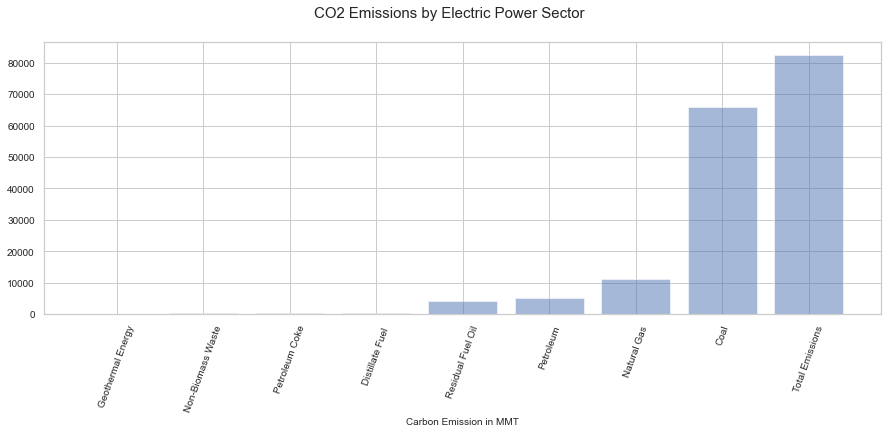

In [12]:
fig = plt.figure(figsize=(15,5))
x_label = cols
x_tick = np.arange(len(cols))
plt.bar(x_tick, CO2_per_source, align = 'center', alpha = 0.5)
fig.suptitle("CO2 Emissions by Electric Power Sector", fontsize=15)
plt.xticks(x_tick, x_label, rotation = 70, fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Carbon Emission in MMT', fontsize=10)
#plt.tight_layout()
plt.show()

Dari bar chart di atas, kita dapat melihat Coal Emission memiliki kontribusi significant diikuti oleh Natural Gas

# Total CO2 Emission Analysis Using Deep Learning

Untuk membangun model time series dan membuat forecasting menggunakan pendekatan deep learning, kita akan menggunakan total CO2 emission dari electrical power generation. Pertama akan kita slice datanya terlebih dahulu

In [13]:
emissions = ts.iloc[:,1:] 
emissions= emissions.groupby(['Description', pd.Grouper(freq='M')])['Value'].sum().unstack(level = 0)
mte = emissions['Total Energy Electric Power Sector CO2 Emissions'] # Monthly total emission (mte)
mte

YYYYMM
1973-01-31    111.621
1973-02-28     99.185
1973-03-31     99.112
1973-04-30     93.183
1973-05-31     98.012
               ...   
2016-03-31    115.997
2016-04-30    113.815
2016-05-31    129.440
2016-06-30    172.074
2016-07-31    201.958
Freq: M, Name: Total Energy Electric Power Sector CO2 Emissions, Length: 523, dtype: float64

<AxesSubplot:xlabel='YYYYMM', ylabel='Total Energy Electric Power Sector CO2 Emissions'>

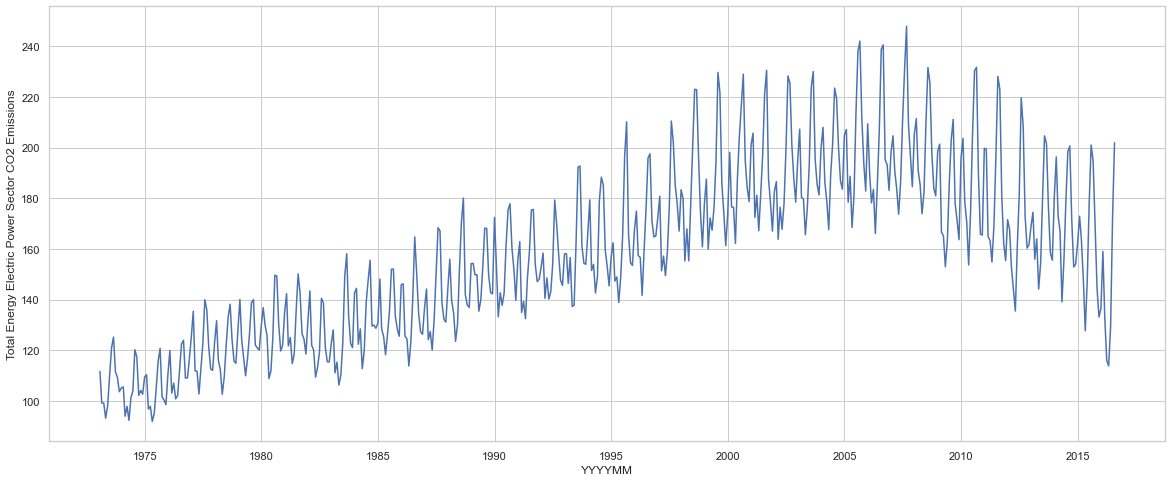

In [14]:
plt.figure(figsize=(20,8))
sns.lineplot(data=mte)

In [15]:
mte.describe()

count    523.000000
mean     157.462096
std       33.908393
min       91.834000
25%      129.736000
50%      155.571000
75%      180.920000
max      247.995000
Name: Total Energy Electric Power Sector CO2 Emissions, dtype: float64

## Feature Scaling

Feature scaling adalah suatu cara untuk membuat numerical data pada dataset agar memiliki rentang nilai (scale) yang sama.

Pertama kami mengubah Series 'mte' menjadi pandas DataFrame

In [16]:
mte = mte.to_frame()

In [17]:
mte.columns = ['total_emission']
mte

,total_emission
YYYYMM,
1973-01-31,111.621
1973-02-28,99.185
1973-03-31,99.112
1973-04-30,93.183
1973-05-31,98.012
...,...
2016-03-31,115.997
2016-04-30,113.815
2016-05-31,129.440


Kami akan melakukan feature scaling di range [0,1]

In [18]:
# split data (5 tahun terakhir menjadi test sets)
train = mte[:len(mte)-12*5] 
test = mte[len(mte)-12*5:]

In [19]:
print("Train Dataset Shape: ", train.shape)
print("Test Dataset Shape: ", test.shape)

Train Dataset Shape:  (463, 1)
Test Dataset Shape:  (60, 1)


In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train_data = scaler.transform(train)
scaled_test_data = scaler.transform(test)

## Model Architecture

1. LSTM dengan 200 neurons pada layer pertama
2. Menggunakan activation function relu
3. Menggunakan Mean Square Error (MSE) loss function dan versi Adam efisien dari SGD
4. Model akan melakukan fit untuk 20 training epoch




In [21]:
from keras.preprocessing.sequence import TimeseriesGenerator

n_input = 12
n_features= 1
generator = TimeseriesGenerator(scaled_train_data, scaled_train_data, length=n_input, batch_size=1)

In [22]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

lstm_model = Sequential()
lstm_model.add(LSTM(200, activation='relu', input_shape=(n_input, n_features)))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')

lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 200)               161600    
                                                                 
 dense (Dense)               (None, 1)                 201       
                                                                 
Total params: 161,801
Trainable params: 161,801
Non-trainable params: 0
_________________________________________________________________


In [23]:
lstm_model.fit_generator(generator,epochs=20)

Epoch 1/20
451/451 [==============================] - 17s 30ms/step - loss: 0.0172
Epoch 2/20
451/451 [==============================] - 13s 29ms/step - loss: 0.0112
Epoch 3/20
451/451 [==============================] - 13s 29ms/step - loss: 0.0064
Epoch 4/20
451/451 [==============================] - 13s 29ms/step - loss: 0.0047
Epoch 5/20
451/451 [==============================] - 13s 29ms/step - loss: 0.0040
Epoch 6/20
451/451 [==============================] - 13s 29ms/step - loss: 0.0044
Epoch 7/20
451/451 [==============================] - 13s 29ms/step - loss: 0.0040
Epoch 8/20
451/451 [==============================] - 13s 29ms/step - loss: 0.0038
Epoch 9/20
451/451 [==============================] - 13s 29ms/step - loss: 0.0043
Epoch 10/20
451/451 [==============================] - 13s 29ms/step - loss: 0.0036
Epoch 11/20
451/451 [==============================] - 13s 29ms/step - loss: 0.0034
Epoch 12/20
451/451 [==============================] - 13s 29ms/step - loss: 0.0032
E

Plot line graph untuk menunjukkan jumlah loss berdasarkan epochnya

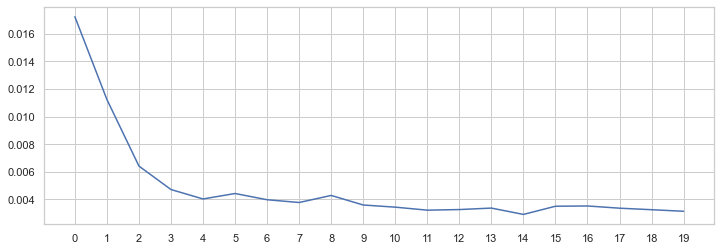

In [24]:
losses_lstm = lstm_model.history.history['loss']
plt.figure(figsize=(12,4))
plt.xticks(np.arange(0,21,1))
plt.plot(range(len(losses_lstm)),losses_lstm);

Berdasarkan plot diatas, dapat kita lihat bahwa model mendapatkan loss fucntion yang kecil di data training, sehingga dapat disimpulkan bahwa model dapat fit dengan baik pada data training

## Model Evaluation dan Prediksi

Selanjutnya kami melakukan evaluasi model menggunakan metrik Mean Square Error (MSE) dan Root Mean Square Error (RMSE). Kemudian memprediksi model pada data testing

In [25]:
lstm_predictions_scaled = list()

batch = scaled_train_data[-n_input:]
current_batch = batch.reshape((1, n_input, n_features))

for i in range(len(test)):   
    lstm_pred = lstm_model.predict(current_batch)[0]
    lstm_predictions_scaled.append(lstm_pred) 
    current_batch = np.append(current_batch[:,1:,:],[[lstm_pred]],axis=1)

1/1 [==============================] - 0s 20ms/step


In [26]:
lstm_predictions = scaler.inverse_transform(lstm_predictions_scaled)

In [27]:
test['LSTM_Predictions'] = lstm_predictions

In [28]:
test.head()

,total_emission,LSTM_Predictions
YYYYMM,,
2011-08-31,223.092,235.837301
2011-09-30,181.441,202.624684
2011-10-31,162.087,176.582471
2011-11-30,155.398,175.067356
2011-12-31,171.569,197.823891


Plot prediction model pada data testing untuk data Total CO2 Emission 5 tahun terakhir

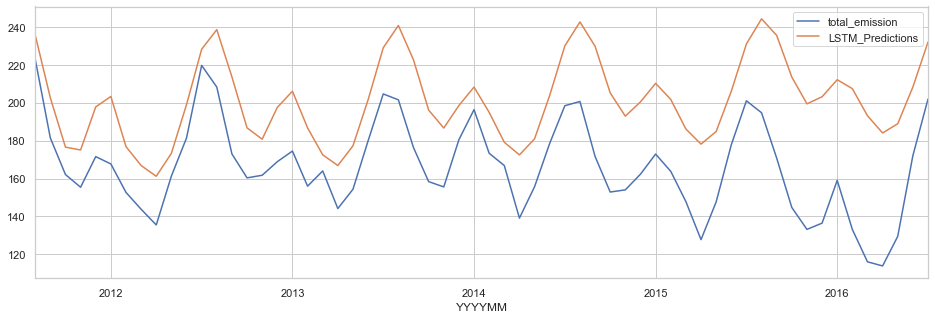

In [29]:
test['total_emission'].plot(figsize = (16,5), legend=True)
test['LSTM_Predictions'].plot(legend = True);

Berdasarkan hasil prediksi yang ditunjukkan pada line plot diatas, dapat dilihat garis data real dengan data prediksi dapat fit dengan cukup baik

In [30]:
from statsmodels.tools.eval_measures import rmse
lstm_rmse_error = rmse(test['total_emission'], test["LSTM_Predictions"])
lstm_mse_error = lstm_rmse_error**2

print(f'MSE Error: {lstm_mse_error}\nRMSE Error: {lstm_rmse_error}')

MSE Error: 1511.8641872147516
RMSE Error: 38.88269778725174


Metrik evaluasi untuk model LSTM pada kasus Total CO2 Emission didapatkan nilai MSE sebesar 1551.86 dan RMSE sebesar 38.88